In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to view all the columns outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
lead_score=pd.read_csv(r'C:\Users\gauta\OneDrive\Documents\UpGrad\Lead Case study\Lead Scoring Assignment\Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_score.shape

(9240, 37)

In [6]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
lead_score=lead_score.applymap(lambda x: x.capitalize() if type(x)==str else x)

In [8]:
lead_score=lead_score.replace('Select',np.nan)

In [9]:
per=((lead_score.isnull().sum())/(lead_score.shape[0]))*100
per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
per=per[per.values>=37]
len(per)

8

In [11]:
col_list=list(per.index)
lead_score.drop(columns=col_list,axis=1,inplace=True)
lead_score.shape

(9240, 29)

In [12]:
((lead_score.isnull().sum())/(lead_score.shape[0]))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [13]:
lead_score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [14]:
lead_score.drop(columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
                        ,'I agree to pay the amount through cheque'],inplace=True)
((lead_score.isnull().sum())/(lead_score.shape[0]))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [15]:
print(lead_score['Country'].isnull().sum())
print(lead_score['Specialization'].isnull().sum())
print(lead_score['What matters most to you in choosing a course'].isnull().sum())
print(lead_score['What is your current occupation'].isnull().sum())


2461
3380
2709
2690


In [16]:
lead_score['Country']=lead_score['Country'].fillna('No Details')
lead_score['Tags']=lead_score['Tags'].fillna('No Details')
lead_score['Specialization']=lead_score['Specialization'].fillna('No Details')
lead_score['What matters most to you in choosing a course']=lead_score['What matters most to you in choosing a course'].fillna('No Details')
lead_score['What is your current occupation']=lead_score['What is your current occupation'].fillna('No Details')

In [17]:

print(lead_score['Country'].value_counts())
print('-------------------------------------')
print(lead_score['Specialization'].value_counts())
print('-------------------------------------')
print(lead_score['What matters most to you in choosing a course'].value_counts())
print('-------------------------------------')
print(lead_score['What is your current occupation'].value_counts())

India                   6492
No Details              2461
United states             69
United arab emirates      53
Singapore                 24
Saudi arabia              21
United kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong kong                  7
Oman                       6
France                     6
Unknown                    5
Nigeria                    4
South africa               4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Ghana                      2
Italy                      2
Belgium                    2
China                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
Philippines                2
Asia/pacific region        2
Sri lanka                  1
Vietnam                    1
Switzerland                1
Liberia                    1
Russia                     1
Tanzania      

In [18]:
((lead_score.isnull().sum())/(lead_score.shape[0]))*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [19]:
print(lead_score['Lead Source'].isnull().sum())
print(lead_score['TotalVisits'].isnull().sum())
print(lead_score['Page Views Per Visit'].isnull().sum())
print(lead_score['Last Activity'].isnull().sum())

36
137
137
103


In [20]:
print(lead_score['Lead Source'].value_counts())
print('-------------------------------------')
print(lead_score['Last Activity'].value_counts())

Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Live chat               2
Social media            2
Testone                 1
Blog                    1
Welearnblog_home        1
Welearn                 1
Youtubechannel          1
Pay per click ads       1
Nc_edm                  1
Name: Lead Source, dtype: int64
-------------------------------------
Email opened                    3437
Sms sent                        2745
Olark chat conversation          973
Page visited on website          640
Converted to lead                428
Email bounced                    326
Email link clicked               267
Form submitted on website        116
Unreachable                       93
Unsubscribed                      61
Had a phone conversation          30
App

In [21]:
lead_score=lead_score[lead_score.isnull().sum(axis=1)<1]

In [22]:
print(lead_score['TotalVisits'].describe())
print('-------------------------------------')
lead_score['Page Views Per Visit'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
-------------------------------------


count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [23]:
lead_score.loc[lead_score['TotalVisits'].isnull()==True,'TotalVisits']=np.mean(lead_score['TotalVisits'])
lead_score.loc[lead_score['Page Views Per Visit'].isnull()==True,'Page Views Per Visit']=np.mean(lead_score['Page Views Per Visit'])

In [24]:
lead_score.shape

(9074, 24)

In [25]:
lead_score['Country'].value_counts()

India                   6491
No Details              2296
United states             69
United arab emirates      53
Singapore                 24
Saudi arabia              21
United kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong kong                  7
Oman                       6
France                     6
Unknown                    5
Nigeria                    4
South africa               4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Ghana                      2
Italy                      2
Belgium                    2
China                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
Philippines                2
Asia/pacific region        2
Sri lanka                  1
Vietnam                    1
Switzerland                1
Liberia                    1
Russia                     1
Tanzania      

In [26]:
def country(x):
    if x=='India':
        return 'India'
    elif x=='No Details':
        return 'No Details'
    else:
        return 'Outside India'
lead_score['Country']=lead_score['Country'].apply(country)
lead_score['Country'].value_counts()

India            6491
No Details       2296
Outside India     287
Name: Country, dtype: int64

In [27]:
lead_score.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [28]:
lead_score.shape

(9074, 22)

In [29]:
((lead_score.isnull().sum())/(lead_score.shape[0]))*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

## Univariate and Bivariate Analysis 

In [30]:
cat_cols = ["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Specialization","What is your current occupation","Tags","Last Notable Activity"]

In [31]:
def uni_cat(X):
    cat_per= lead_score[[X, 'Converted']].groupby([X],as_index=False).mean()
    cat_per["Converted"] = cat_per["Converted"]*100
    cat_per.sort_values(by='Converted', ascending=False, inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    s = sns.countplot(ax=ax1, x = X, data=lead_score, hue ="Converted",order=cat_per[X])
    ax1.set_title(X, fontdict={'fontsize':15,'fontweight':5,'color' :'Blue'})
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax1.legend(['Not Converted','Converted'])
    plt.ylabel("count",fontsize=15)
    plt.xlabel(X,fontsize=15)
    
    
    s = sns.barplot(ax=ax2, x = X, y='Converted', data=cat_per,order=cat_per[X])
    ax2.set_title(X+"( Converted % )",fontdict={"fontsize":15,"fontweight":5,"color":"Blue"})
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted lead_scores [%]', fontsize=15)
    plt.xlabel(X,fontsize=15)

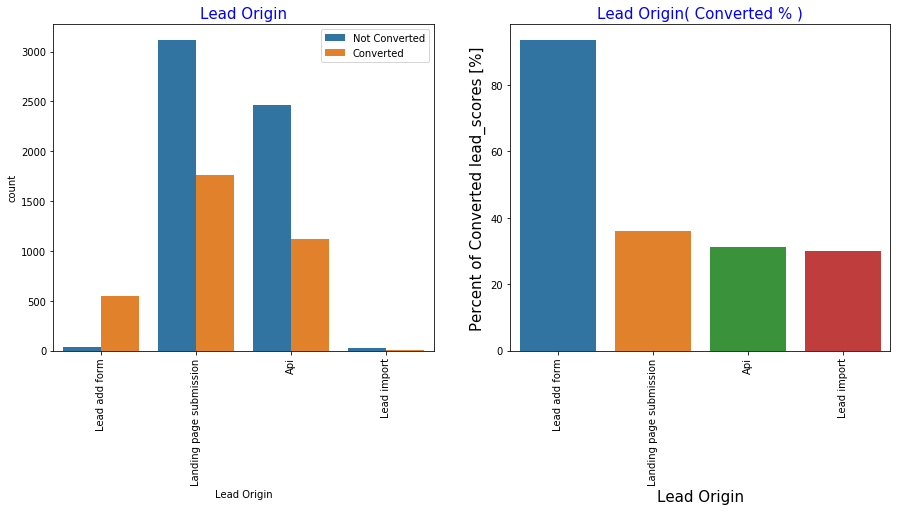

In [32]:
uni_cat("Lead Origin")

From the above plot:

- landing Page submission(approx 37%), lead_score import(approx 28%) and API(approx 35%) have less coversion percentage
- Quick add form(approx 98%), lead_score add(approx 90%) form have highest conversion percentage

#### To improve converting percentage need to concentrate on landing Page submission(has highest number lead_scores), API and lead_score import.

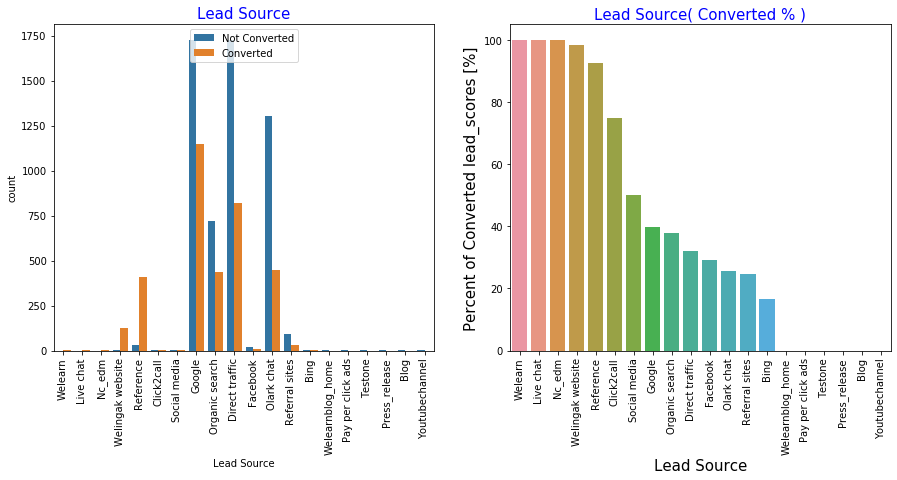

In [33]:
uni_cat("Lead Source")

In [34]:
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Click2call',"Nc_edm",'Live chat','Pay per Click ads', 'Press_release','Social media', 'Welearn', 'Bing', 'Blog', 'Testone', 'Welearnblog_home', 'Youtubechannel'], 'Others')

In [35]:
lead_score["Lead Source"] = lead_score["Lead Source"].replace(["<bound method Series.mode of 0           Olark chat\n1       Organic search\n2       Direct traffic\n3       Direct traffic\n4               Google\n             ...      \n9235    Direct traffic\n9236    Direct traffic\n9237    Direct traffic\n9238            Google\n9239    Direct traffic\nName: lead_score Source, Length: 9240, dtype: object>","Others"])

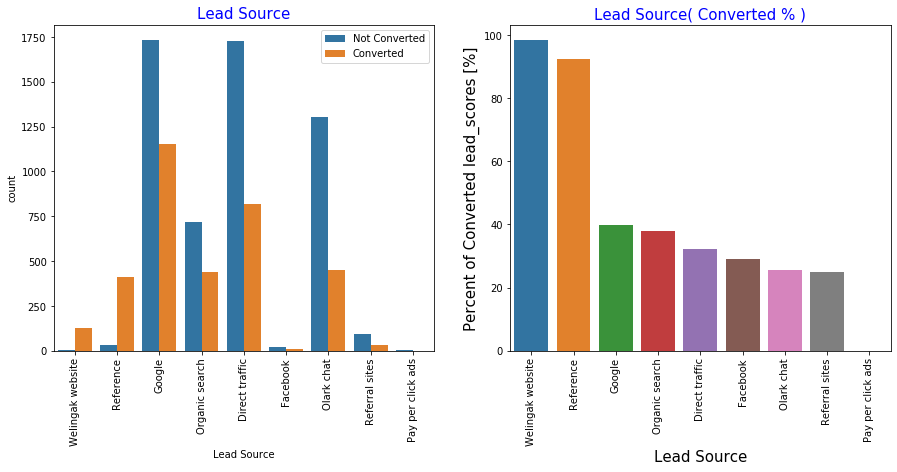

In [36]:
uni_cat("Lead Source")

From the above plot:
- Google, Direct traffic and olark chat has more lead_scores
- Wellingak website, reference have high conversion percentage

#### The high lead_score source variables like Google,Direct traffic, Olark Chat, are to be concentrated more to convert the lead_scores to hot lead_scores

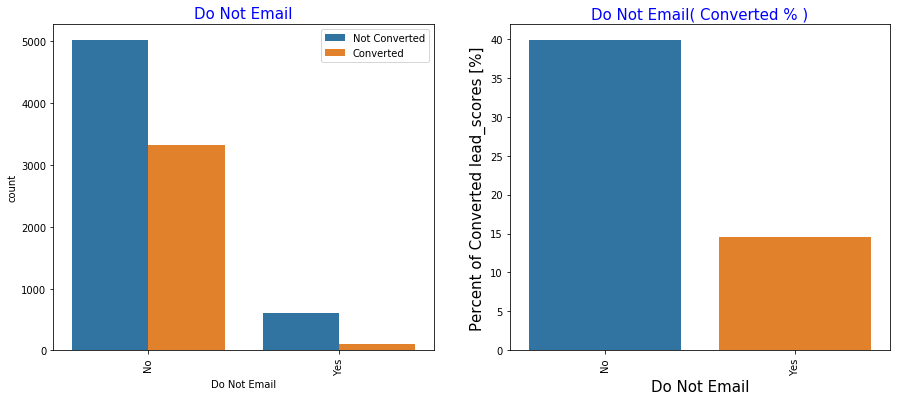

In [37]:
uni_cat("Do Not Email")

From the above plot:
- Those who Email are the most important lead_scores who are converting into hot lead_scores, sales team should concentrate on who do email

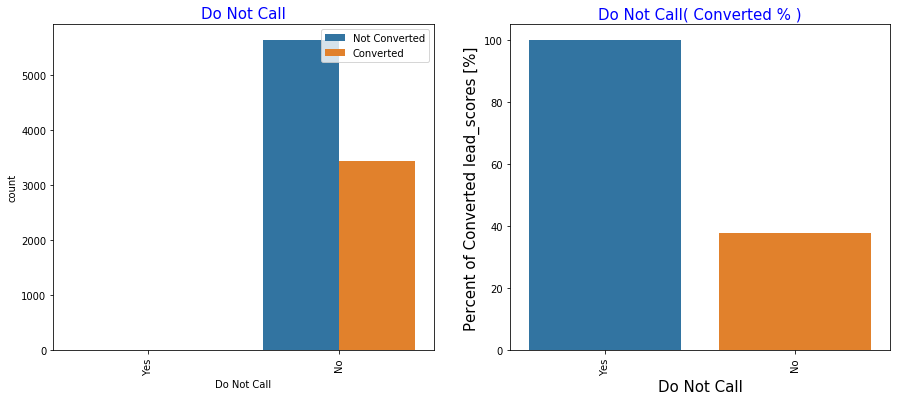

In [38]:
uni_cat("Do Not Call")

From the above plot:
- Those who Call are the most important lead_scores who are converting into hot lead_scores, sales team should concentrate on who do Calls

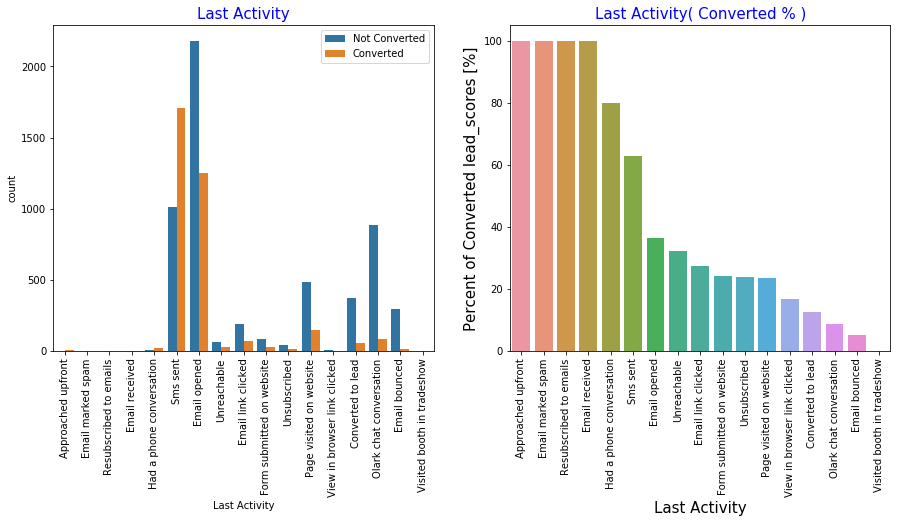

In [39]:
uni_cat("Last Activity")

In [40]:
# again there are many lead_scores which barely have count, so lets combine them to one variable

lead_score["Last Activity"] = lead_score["Last Activity"].replace(["Had a phone conversation","Approached upfront","View in browser link clicked","Email marked spam","Email received","Resubscribed to emails","Visited booth in tradeshow"],"Others")

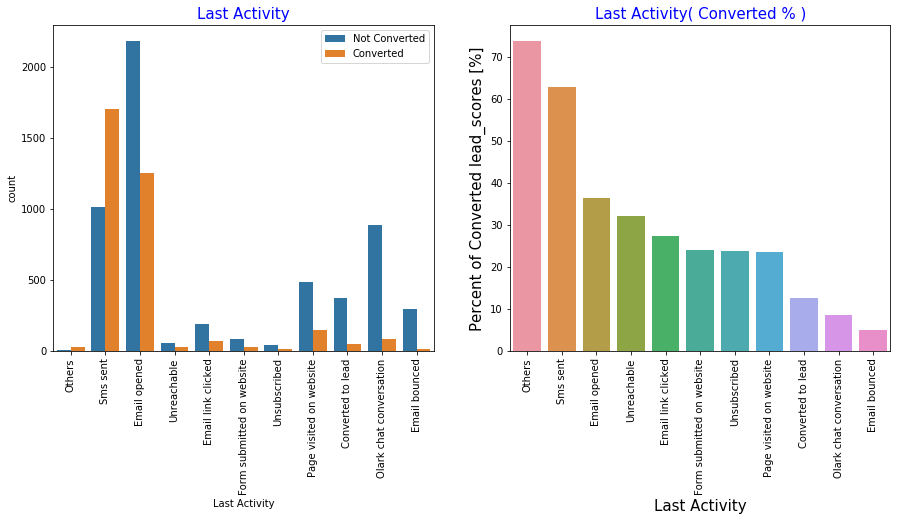

In [41]:
uni_cat("Last Activity")

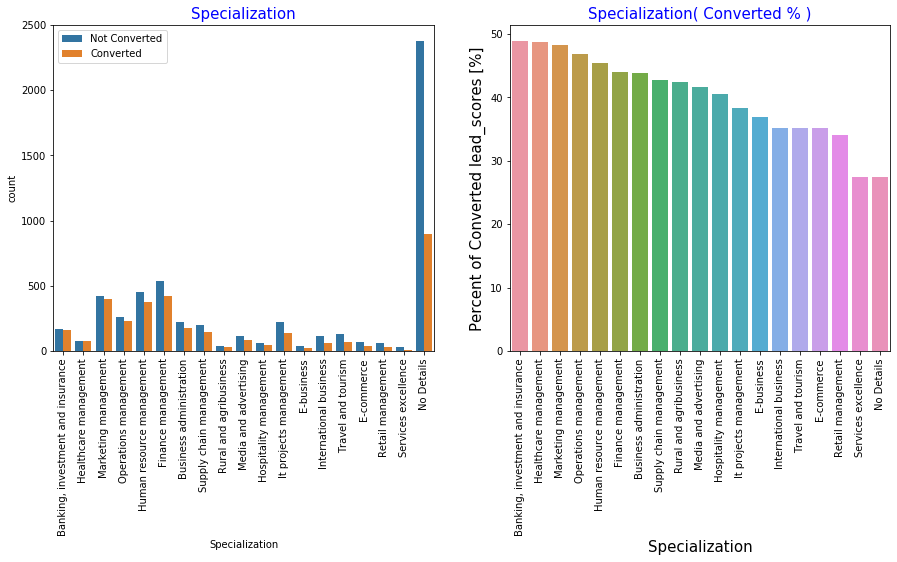

In [42]:
uni_cat("Specialization")

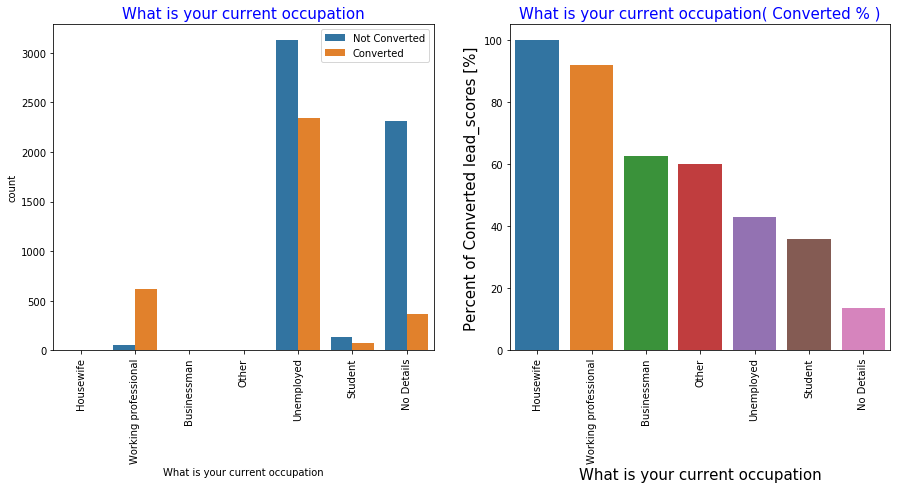

In [43]:
uni_cat("What is your current occupation")

In [44]:
lead_score["What matters most to you in choosing a course"].value_counts()

Better career prospects      6370
No Details                   2702
Flexibility & convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
lead_score["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [46]:
lead_score["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [47]:
lead_score["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [48]:
lead_score["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [49]:
lead_score["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [50]:
lead_score["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [51]:
lead_score["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [52]:
lead_score["Tags"] = lead_score["Tags"].replace(["Lost to others","Want to take admission but has financial problems","Still thinking","Interested in next batch","In confusion whether part time or dlp","Lateral student","University not recognized","Shall take in the next coming month","Recognition issue (dec approval)"],"Others")

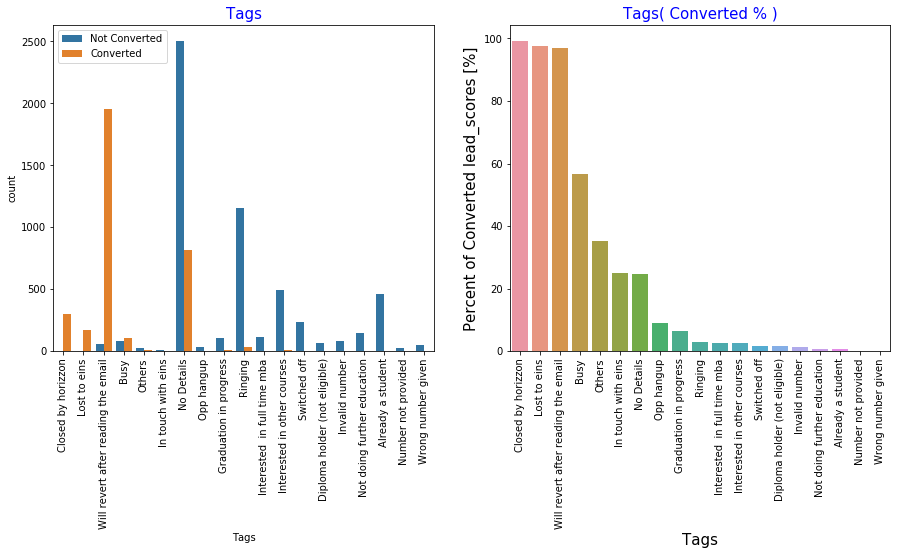

In [53]:
uni_cat("Tags")

"No details" kind of *tag* has more lead_scores, but unfortunately there are not even 50% who converted to positive.


Surprisingly, "Will revert after reading the email" *tag* has highest converting lead_scores which is very important point to be noted

In [54]:
lead_score["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [55]:
lead_score["Last Notable Activity"] = lead_score["Last Notable Activity"].replace(["Email marked spam","Form submitted on website","Resubscribed to emails","Approached upfront","Email received","View in browser link clicked","Had a phone conversation"],"Others")

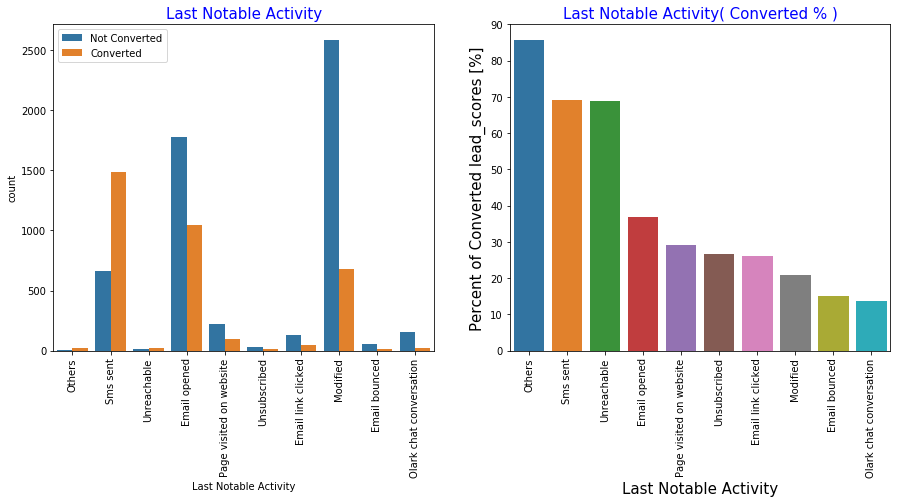

In [56]:
uni_cat("Last Notable Activity")

Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Recommendation, Free copy, data are very skewed and can be deleted as they will not add any value to the model.

### Univariate Analysis Numerical 

In [57]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074

In [58]:
lead_score.TotalVisits.value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [59]:
num_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

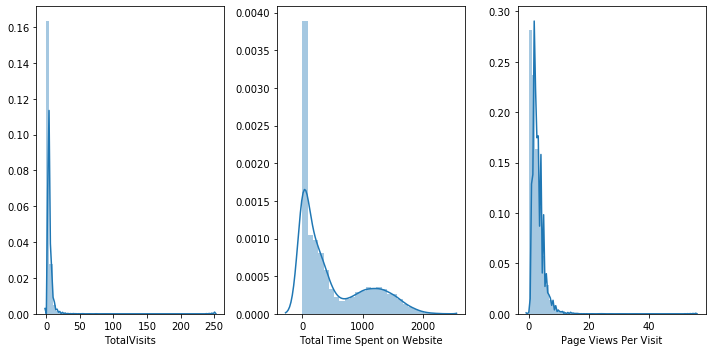

In [60]:
plt.figure(figsize=[10,5])
i=1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.distplot(lead_score[col])
    plt.tight_layout()
    i = i+1

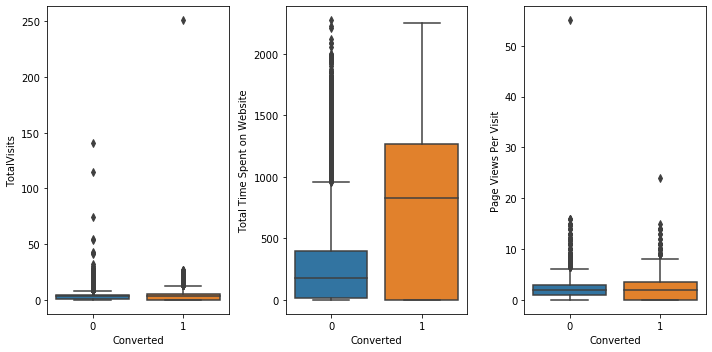

In [61]:
plt.figure(figsize=[10,5])
i=1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=lead_score[col],x=lead_score["Converted"])
    plt.tight_layout()
    i=i+1

#### Outliers Treatment
Outliers are treated to the Numerical variables 

In [62]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

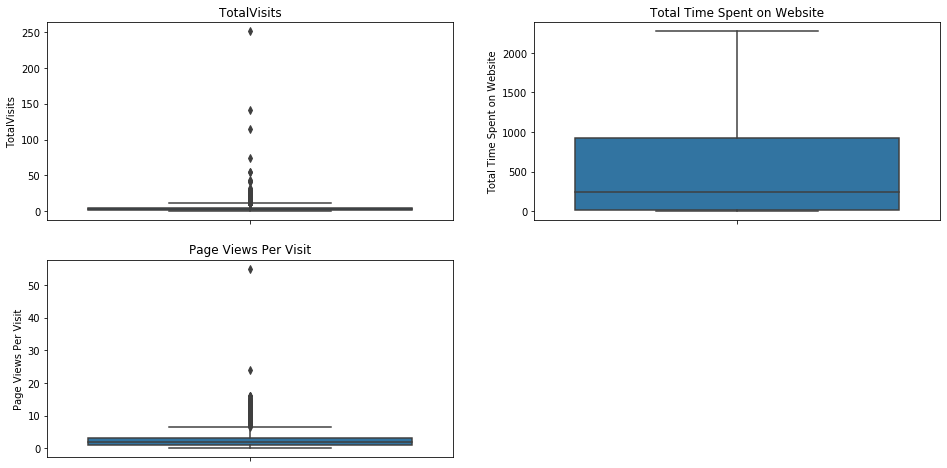

In [63]:
i=1
plt.figure(figsize=[16,8])
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead_score[col])
    plt.title(col)
    i=i+1

## Dummy Variable Creation  

In [64]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074

In [65]:
yes_no_list=['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
def binary(x):
    if x=='Yes':
        return 1
    else:
         return 0
for i in yes_no_list:
    lead_score[i]=lead_score[i].apply(binary)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,Api,Olark chat,0,0,0,0.0,0,0.0,Page visited on website,No Details,No Details,Unemployed,Better career prospects,0,0,0,0,0,0,Interested in other courses,0,Modified
1,Api,Organic search,0,0,0,5.0,674,2.5,Email opened,India,No Details,Unemployed,Better career prospects,0,0,0,0,0,0,Ringing,0,Email opened
2,Landing page submission,Direct traffic,0,0,1,2.0,1532,2.0,Email opened,India,Business administration,Student,Better career prospects,0,0,0,0,0,0,Will revert after reading the email,1,Email opened
3,Landing page submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and advertising,Unemployed,Better career prospects,0,0,0,0,0,0,Ringing,0,Modified
4,Landing page submission,Google,0,0,1,2.0,1428,1.0,Converted to lead,India,No Details,Unemployed,Better career prospects,0,0,0,0,0,0,Will revert after reading the email,0,Modified


In [66]:
lead_new=lead_score.copy()

In [67]:
obj_col_list=[]
for i in lead_score.columns:
    if lead_score[i].dtype=='O':
        obj_col_list.append(i)
obj_col_list

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Last Notable Activity']

In [68]:
for i in obj_col_list:
    print(lead_score[i].value_counts())
    print('-----------------------------------')

Landing page submission    4885
Api                        3578
Lead add form               581
Lead import                  30
Name: Lead Origin, dtype: int64
-----------------------------------
Google               2885
Direct traffic       2548
Olark chat           1755
Organic search       1156
Reference             444
Welingak website      129
Referral sites        125
Facebook               31
Pay per click ads       1
Name: Lead Source, dtype: int64
-----------------------------------
Email opened                 3432
Sms sent                     2716
Olark chat conversation       972
Page visited on website       640
Converted to lead             428
Email bounced                 312
Email link clicked            267
Form submitted on website     116
Unreachable                    90
Unsubscribed                   59
Others                         42
Name: Last Activity, dtype: int64
-----------------------------------
India            6491
No Details       2296
Outside India 

In [69]:
lo=pd.get_dummies(lead_score['Specialization'],prefix='Specialization')
lo=lo.drop(['Specialization_No Details'],axis=1)
lead_score=pd.concat([lead_score,lo],axis=1)

In [70]:
lo=pd.get_dummies(lead_score['What is your current occupation'],prefix='occupation')
lo=lo.drop(['occupation_No Details'],axis=1)
lead_score=pd.concat([lead_score,lo],axis=1)

In [71]:
lo=pd.get_dummies(lead_score['What matters most to you in choosing a course'],prefix='selection')
lo=lo.drop(['selection_No Details'],axis=1)
lead_score=pd.concat([lead_score,lo],axis=1)

In [72]:
lo=pd.get_dummies(lead_score['Tags'],prefix='Tags')
lo=lo.drop(['Tags_No Details'],axis=1)
lead_score=pd.concat([lead_score,lo],axis=1)

In [73]:
lo=pd.get_dummies(lead_score['Lead Origin'],prefix='Lead Origin',drop_first=True)
lead_score=pd.concat([lead_score,lo],axis=1)

In [74]:
lo=pd.get_dummies(lead_score['Lead Source'],prefix='Lead Source',drop_first=True)
lead_score=pd.concat([lead_score,lo],axis=1)

In [75]:
lo=pd.get_dummies(lead_score['Country'],prefix='Country',drop_first=True)
lead_score=pd.concat([lead_score,lo],axis=1)

In [76]:
lo=pd.get_dummies(lead_score['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
lead_score=pd.concat([lead_score,lo],axis=1)

In [77]:
lo=pd.get_dummies(lead_score['Last Activity'],prefix='Last Activity',drop_first=True)
lead_score=pd.concat([lead_score,lo],axis=1)

In [78]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity,"Specialization_Banking, investment and insurance",Specialization_Business administration,Specialization_E-business,Specialization_E-commerce,Specialization_Finance management,Specialization_Healthcare management,Specialization_Hospitality management,Specialization_Human resource management,Specialization_International business,Specialization_It projects management,Specialization_Marketing management,Specialization_Media and advertising,Specialization_Operations management,Specialization_Retail management,Specialization_Rural and agribusiness,Specialization_Services excellence,Specialization_Supply chain management,Specialization_Travel and tourism,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working professional,selection_Better career prospects,selection_Flexibility & convenience,selection_Other,Tags_Already a student,Tags_Busy,Tags_Closed by horizzon,Tags_Diploma holder (not eligible),Tags_Graduation in progress,Tags_In touch with eins,Tags_Interested in full time mba,Tags_Interested in other courses,Tags_Invalid number,Tags_Lost to eins,Tags_Not doing further education,Tags_Number not provided,Tags_Opp hangup,Tags_Others,Tags_Ringing,Tags_Switched off,Tags_Will revert after reading the email,Tags_Wrong number given,Lead Origin_Landing page submission,Lead Origin_Lead add form,Lead Origin_Lead import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Welingak website,Country_No Details,Country_Outside India,Last Notable Activity_Email link clicked,Last Notable Activity_Email opened,Last Notable Activity_Modified,Last Notable Activity_Olark chat conversation,Last Notable Activity_Others,Last Notable Activity_Page visited on website,Last Notable Activity_Sms sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Activity_Email bounced,Last Activity_Email link clicked,Last Activity_Email opened,Last Activity_Form submitted on website,Last Activity_Olark chat conversation,Last Activity_Others,Last Activity_Page visited on website,Last Activity_Sms sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,Api,Olark chat,0,0,0,0.0,0,0.0,Page visited on website,No Details,No Details,Unemployed,Better career prospects,0,0,0,0,0,0,Interested in other courses,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Api,Organic search,0,0,0,5.0,674,2.5,Email opened,India,No Details,Unemployed,Better career prospects,0,0,0,0,0,0,Ringing,0,Email opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Landing page submission,Direct traffic,0,0,1,2.0,1532,2.0,Email opened,India,Business administration,Student,Better career prospects,0,0,0,0,0,0,Will revert after reading the email,1,Email opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing page submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and advertising,Unemployed,Better career prospects,0,0,0,0,0,0,Ringing,0,Modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing page submission,Google,0,0,1,2.0,1428,1.0,Co

In [79]:
lead_score.drop(columns=['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Last Notable Activity'],inplace=True)

In [80]:
lead_score.shape

(9074, 90)

## Test-Train-Split 

In [81]:
x=lead_score.drop(['Converted'],axis=1)

In [82]:
y=lead_score['Converted']

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [85]:
num_param=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [86]:
x_train[num_param]=scaler.fit_transform(x_train[num_param])

In [87]:
conversion=(sum(lead_score['Converted'])/len(lead_score['Converted'].index)*100)
conversion

37.85541106458012

## Looking at Correlations 

In [88]:
# plt.figure(figsize=([30,40]))
# sns.heatmap(lead_score.corr(),annot=True,cmap='RdYlGn')

## Model Building

In [89]:
import statsmodels.api as sm

In [90]:
logm=sm.GLM(y_train,(sm.add_constant(x_train)), family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Feb 2021   Deviance:                          nan
Time:                        14:01:01   Pearson chi2:                 2.22e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             -1.39e+15   1.24e+07  -1.12e+08      0.000   -1.39e+15   -1.39e+15
Do Not Email                                     -3.484e+14   4.45e+06  -7.82e+07      0.000   -3.48e+14   -3.48e+14
Do Not Call                                       1.034e+15   4.77e+07   2.17e+07      0.000    1.03e+15    1.03e+15
TotalVisits                                       1.468e+15   4.88e+07   3.01e+07      0.000    1.47e+15    1.47e+15
Total Time Spent on Website                       5.439e+14   4.27e+06   1.27e+08      0.000    5.44e+14    5.44e+14
Page Views Per Visit                             -3.951e+14   1.44e+07  -2.74e+07      0.000   -3.95e+14   -3.95e+14
Search                                            1.753e+14   2.39e+07   7.33e+06      0.000    1.75e+14    1.75e+14
Newspaper Article                                 3.599e+15   6.74e+07   5.34e+07      0.000     3.6e+15     3.6e+15
X Education Forums                                -7.57e+15   1.13e+08  -6.69e+07      0.000   -7.57e+15   -7.57e+15
Newspaper                                        -3.066e+15   6.73e+07  -4.55e+07      0.000   -3.07e+15   -3.07e+15
Digital Advertisement                            -3.902e+14   4.81e+07  -8.11e+06      0.000    -3.9e+14    -3.9e+14
Through Recommendations                           7.041e+14   3.57e+07   1.97e+07      0.000    7.04e+14    7.04e+14
A free copy of Mastering The Interview            1.098e+13   2.73e+06   4.03e+06      0.000     1.1e+13     1.1e+13
Specialization_Banking, investment and insurance  2.434e+14   5.42e+06   4.49e+07      0.000    2.43e+14    2.43e+14
Specialization_Business administration            1.854e+14   5.31e+06   3.49e+07      0.000    1.85e+14    1.85e+14
Specialization_E-business                         1.081e+14   1.11e+07   9.78e+06      0.000    1.08e+14    1.08e+14
Specialization_E-commerce                          1.87e+14   8.41e+06   2.22e+07      0.000    1.87e+14    1.87e+14
Specialization_Finance management                  1.45e+13   4.16e+06   3.49e+06      0.000    1.45e+13    1.45e+13
Specialization_Healthcare management              1.905e+13   7.19e+06   2.65e+06      0.000    1.91e+13    1.91e+13
Specialization_Hospitality management             1.423e+14   8.25e+06   1.73e+07      0.000    1.42e+14    1.42e+14
Specialization_Human resource management          4.307e+13   4.18e+06   1.03e+07      0.000    4.31e+13    4.31e+13
Specialization_International business            -6.624e+13   6.82e+06  -9.71e+06      0.000   -6.62e+13   -6.62e+13
Specialization_It projects management             2.708e+14   5.29e+06   5.12e+07      0.000    2.71e+14    2.71e+14
Specialization_Marketing management      

## Model Building using RFE 

In [91]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(x_train,y_train)

In [93]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('Do Not Call', False, 56),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Search', False, 50),
 ('Newspaper Article', False, 64),
 ('X Education Forums', False, 63),
 ('Newspaper', False, 60),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 74),
 ('A free copy of Mastering The Interview', False, 39),
 ('Specialization_Banking, investment and insurance', False, 28),
 ('Specialization_Business administration', False, 42),
 ('Specialization_E-business', False, 59),
 ('Specialization_E-commerce', False, 40),
 ('Specialization_Finance management', False, 68),
 ('Specialization_Healthcare management', False, 41),
 ('Specialization_Hospitality management', False, 69),
 ('Specialization_Human resource management', False, 44),
 ('Specialization_International business', False, 46),
 ('Specialization_It projects management', False, 34),
 ('Specialization_Marketing management

In [94]:
x_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Tags_Already a student', 'Tags_Closed by horizzon', 'Tags_Diploma holder (not eligible)', 'Tags_Interested  in full time mba', 'Tags_Interested in other courses', 'Tags_Invalid number', 'Tags_Lost to eins', 'Tags_Not doing further education', 'Tags_Number not provided', 'Tags_Ringing', 'Tags_Switched off', 'Tags_Will revert after reading the email', 'Tags_Wrong number given', 'Lead Source_Welingak website'], dtype='object')

In [95]:
col_rfe=x_train.columns[rfe.support_]
col_rfe

Index(['Total Time Spent on Website', 'Tags_Already a student', 'Tags_Closed by horizzon', 'Tags_Diploma holder (not eligible)', 'Tags_Interested  in full time mba', 'Tags_Interested in other courses', 'Tags_Invalid number', 'Tags_Lost to eins', 'Tags_Not doing further education', 'Tags_Number not provided', 'Tags_Ringing', 'Tags_Switched off', 'Tags_Will revert after reading the email', 'Tags_Wrong number given', 'Lead Source_Welingak website'], dtype='object')

In [96]:
x_train_rfe=sm.add_constant(x_train[col_rfe])
logm=sm.GLM(y_train,x_train_rfe,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1550.8
Date:                Sun, 07 Feb 2021   Deviance:                       3101.6
Time:                        14:01:05   Pearson chi2:                 6.13e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9942      0.070    -28.446      0.000      -2.132      -1.857
Total Time Spent on Website                  3.7442      0.190     19.737      0.000       3.372       4.116
Tags_Already a student                      -3.9735      0.715     -5.554      0.000      -5.376      -2.571
Tags_Closed by horizzon                      6.0075      0.715      8.403      0.000       4.606       7.409
Tags_Diploma holder (not eligible)          -3.0007      1.023     -2.932      0.003      -5.006      -0.995
Tags_Interested  in full time mba           -2.7293      0.730     -3.740      0.000      -4.160      -1.299
Tags_Interested in other courses            -2.4577      0.318     -7.730      0.000      -3.081      -1.835
Tags_Invalid number                        -23.2232   1.67e+04     -0.001      0.999   -3.27e+04    3.26e+04
Tags_Lost to eins                            5.0873      0.721      7.058      0.000       3.675       6.500
Tags_Not doing further education            -3.5775      1.015     -3.524      0.000      -5.567      -1.588
Tags_Number not provided                   -23.9428   2.79e+04     -0.001      0.999   -5.48e+04    5.47e+04
Tags_Ringing                                -2.7678      0.238    -11.629      0.000      -3.234      -2.301
Tags_Switched off                           -2.6284      0.519     -5.065      0.000      -3.646      -1.611
Tags_Will revert after reading the email     4.8588      0.182     26.739      0.000       4.503       5.215
Tags_Wrong number given                    -23.5944   2.22e+04     -0.001      0.999   -4.36e+04    4.35e+04
Lead Source_Welingak website                 5.5876      0.720      7.760      0.000       4.176       6.999
============================================================================================================
"""

In [97]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_rfe)
y_train_pred[:10]

3009    0.209742
1012    0.157804
9226    0.008476
4750    0.581014
7987    0.996850
1281    0.989224
2880    0.120520
4971    0.637790
7536    0.997958
1248    0.095865
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20974188, 0.15780399, 0.00847595, 0.5810143 , 0.99685041,
       0.98922427, 0.12052013, 0.63778995, 0.99795752, 0.09586531])

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.209742,3009
1,0,0.157804,1012
2,0,0.008476,9226
3,1,0.581014,4750
4,1,0.996850,7987


In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.209742,3009,0
1,0,0.157804,1012,0
2,0,0.008476,9226,0
3,1,0.581014,4750,1
4,1,0.996850,7987,1


In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3727  178]
 [ 453 1993]]


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9006455676271453


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe].values, i) for i in range(x_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.59
12,Tags_Will revert after reading the email,1.38
10,Tags_Ringing,1.06
2,Tags_Closed by horizzon,1.04
7,Tags_Lost to eins,1.03
1,Tags_Already a student,1.02
5,Tags_Interested in other courses,1.02
4,Tags_Interested in full time mba,1.01
8,Tags_Not doing further education,1.01
11,Tags_Switched off,1.01


## Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [106]:
col_rfe=col_rfe.drop('Tags_Invalid number')

In [107]:
x_train_rfe=sm.add_constant(x_train_rfe[col_rfe])
logm=sm.GLM(y_train,x_train_rfe, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1563.9
Date:                Sun, 07 Feb 2021   Deviance:                       3127.8
Time:                        14:01:06   Pearson chi2:                 6.20e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0273      0.070    -28.959      0.000      -2.165      -1.890
Total Time Spent on Website                  3.7597      0.189     19.874      0.000       3.389       4.130
Tags_Already a student                      -3.9462      0.715     -5.516      0.000      -5.348      -2.544
Tags_Closed by horizzon                      6.0393      0.715      8.448      0.000       4.638       7.440
Tags_Diploma holder (not eligible)          -2.9735      1.023     -2.906      0.004      -4.979      -0.968
Tags_Interested  in full time mba           -2.7022      0.730     -3.702      0.000      -4.133      -1.272
Tags_Interested in other courses            -2.4303      0.318     -7.643      0.000      -3.054      -1.807
Tags_Lost to eins                            5.1182      0.721      7.101      0.000       3.705       6.531
Tags_Not doing further education            -3.5505      1.015     -3.497      0.000      -5.540      -1.561
Tags_Number not provided                   -23.9168   2.79e+04     -0.001      0.999   -5.47e+04    5.47e+04
Tags_Ringing                                -2.7410      0.238    -11.517      0.000      -3.207      -2.275
Tags_Switched off                           -2.6010      0.519     -5.011      0.000      -3.618      -1.584
Tags_Will revert after reading the email     4.8900      0.182     26.913      0.000       4.534       5.246
Tags_Wrong number given                    -23.5667   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
Lead Source_Welingak website                 5.6206      0.720      7.806      0.000       4.209       7.032
============================================================================================================
"""

In [108]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_rfe)
y_train_pred[:10]

3009    0.204758
1012    0.153627
9226    0.008423
4750    0.575287
7987    0.996878
1281    0.989277
2880    0.117058
4971    0.632578
7536    0.997982
1248    0.096223
dtype: float64

In [109]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20475831, 0.15362664, 0.00842308, 0.57528694, 0.9968781 ,
       0.98927685, 0.11705838, 0.63257761, 0.99798158, 0.09622312])

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.204758,3009
1,0,0.153627,1012
2,0,0.008423,9226
3,1,0.575287,4750
4,1,0.996878,7987


In [111]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.204758,3009,0
1,0,0.153627,1012,0
2,0,0.008423,9226,0
3,1,0.575287,4750,1
4,1,0.996878,7987,1


In [112]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3729  176]
 [ 461 1985]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8997008345142498


In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe].values, i) for i in range(x_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.58
11,Tags_Will revert after reading the email,1.38
9,Tags_Ringing,1.06
2,Tags_Closed by horizzon,1.04
6,Tags_Lost to eins,1.03
1,Tags_Already a student,1.02
5,Tags_Interested in other courses,1.02
4,Tags_Interested in full time mba,1.01
7,Tags_Not doing further education,1.01
10,Tags_Switched off,1.01


In [115]:
col_rfe=col_rfe.drop(['Tags_Number not provided'])

In [116]:
x_train_rfe=sm.add_constant(x_train_rfe[col_rfe])
logm=sm.GLM(y_train,x_train_rfe, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1571.3
Date:                Sun, 07 Feb 2021   Deviance:                       3142.7
Time:                        14:01:07   Pearson chi2:                 6.20e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0327      0.070    -29.069      0.000      -2.170      -1.896
Total Time Spent on Website                  3.7257      0.188     19.797      0.000       3.357       4.095
Tags_Already a student                      -3.9280      0.715     -5.491      0.000      -5.330      -2.526
Tags_Closed by horizzon                      6.0476      0.715      8.460      0.000       4.646       7.449
Tags_Diploma holder (not eligible)          -2.9552      1.023     -2.888      0.004      -4.960      -0.950
Tags_Interested  in full time mba           -2.6838      0.730     -3.678      0.000      -4.114      -1.254
Tags_Interested in other courses            -2.4124      0.318     -7.592      0.000      -3.035      -1.790
Tags_Lost to eins                            5.1283      0.721      7.116      0.000       3.716       6.541
Tags_Not doing further education            -3.5317      1.015     -3.479      0.001      -5.521      -1.542
Tags_Ringing                                -2.7218      0.238    -11.447      0.000      -3.188      -2.256
Tags_Switched off                           -2.5832      0.519     -4.979      0.000      -3.600      -1.566
Tags_Will revert after reading the email     4.8995      0.182     26.976      0.000       4.544       5.256
Tags_Wrong number given                    -22.5484   1.35e+04     -0.002      0.999   -2.64e+04    2.64e+04
Lead Source_Welingak website                 5.6261      0.720      7.814      0.000       4.215       7.037
============================================================================================================
"""

In [117]:
y_train_pred = res.predict(x_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.202900,3009,0
1,0,0.152551,1012,0
2,0,0.008539,9226,0
3,1,0.568816,4750,1
4,1,0.996817,7987,1


In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3731  174]
 [ 468 1978]]


In [119]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.89891355692017


In [120]:
vif = pd.DataFrame()
vif['Features'] = x_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe].values, i) for i in range(x_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.58
10,Tags_Will revert after reading the email,1.38
8,Tags_Ringing,1.06
2,Tags_Closed by horizzon,1.04
6,Tags_Lost to eins,1.03
1,Tags_Already a student,1.02
5,Tags_Interested in other courses,1.02
4,Tags_Interested in full time mba,1.01
7,Tags_Not doing further education,1.01
9,Tags_Switched off,1.01


In [121]:
col_rfe=col_rfe.drop(['Tags_Wrong number given'])

In [122]:
x_train_rfe=sm.add_constant(x_train_rfe[col_rfe])
logm=sm.GLM(y_train,x_train_rfe, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.5
Date:                Sun, 07 Feb 2021   Deviance:                       3161.0
Time:                        14:01:07   Pearson chi2:                 6.22e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0463      0.070    -29.290      0.000      -2.183      -1.909
Total Time Spent on Website                  3.7058      0.187     19.779      0.000       3.339       4.073
Tags_Already a student                      -3.9070      0.715     -5.463      0.000      -5.309      -2.505
Tags_Closed by horizzon                      6.0628      0.715      8.481      0.000       4.662       7.464
Tags_Diploma holder (not eligible)          -2.9341      1.023     -2.868      0.004      -4.939      -0.929
Tags_Interested  in full time mba           -2.6627      0.729     -3.650      0.000      -4.092      -1.233
Tags_Interested in other courses            -2.3915      0.318     -7.531      0.000      -3.014      -1.769
Tags_Lost to eins                            5.1447      0.721      7.139      0.000       3.732       6.557
Tags_Not doing further education            -3.5103      1.015     -3.459      0.001      -5.499      -1.521
Tags_Ringing                                -2.7002      0.238    -11.364      0.000      -3.166      -2.234
Tags_Switched off                           -2.5625      0.519     -4.941      0.000      -3.579      -1.546
Tags_Will revert after reading the email     4.9156      0.182     27.071      0.000       4.560       5.271
Lead Source_Welingak website                 5.6397      0.720      7.833      0.000       4.229       7.051
============================================================================================================
"""

In [123]:
y_train_pred = res.predict(x_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.200147,3009,0
1,0,0.150590,1012,0
2,0,0.008607,9226,0
3,1,0.562451,4750,1
4,1,0.996781,7987,1


In [124]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3735  170]
 [ 476 1970]]


In [125]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8982837348449063


In [126]:
vif = pd.DataFrame()
vif['Features'] = x_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe].values, i) for i in range(x_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.57
10,Tags_Will revert after reading the email,1.38
8,Tags_Ringing,1.06
2,Tags_Closed by horizzon,1.04
6,Tags_Lost to eins,1.03
1,Tags_Already a student,1.02
5,Tags_Interested in other courses,1.02
4,Tags_Interested in full time mba,1.01
7,Tags_Not doing further education,1.01
9,Tags_Switched off,1.01


## Metrics beyond simply accuracy

In [127]:
TN=confusion[0,0]
TP=confusion[1,1]
FN=confusion[1,0]
FP=confusion[0,1]

In [128]:
#Sensitivity
TP/float(TP+FN)

0.8053965658217498

In [129]:
#Specificity
TN/float(TN+FP)

0.9564660691421255

In [130]:
#False negative rate
FN/float(FN+TN)

0.11303728330562812

In [131]:
# False Positive rate
TP/float(TP+FP)

0.9205607476635514

## Plotting an ROC curve 

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

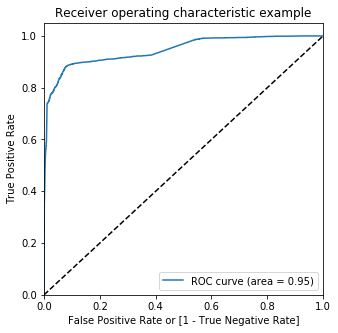

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200147,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.150590,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.008607,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.562451,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.996781,7987,1,1,1,1,1,1,1,1,1,1,1


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.662100  0.984464  0.460179
0.2   0.2  0.883011  0.896157  0.874776
0.3   0.3  0.906471  0.879395  0.923431
0.4   0.4  0.903637  0.847915  0.938540
0.5   0.5  0.898284  0.805397  0.956466
0.6   0.6  0.898126  0.772690  0.976697
0.7   0.7  0.892143  0.745707  0.983867
0.8   0.8  0.892458  0.739166  0.988476
0.9   0.9  0.892930  0.738757  0.989501


## Let's plot accuracy sensitivity and specificity for various probabilities

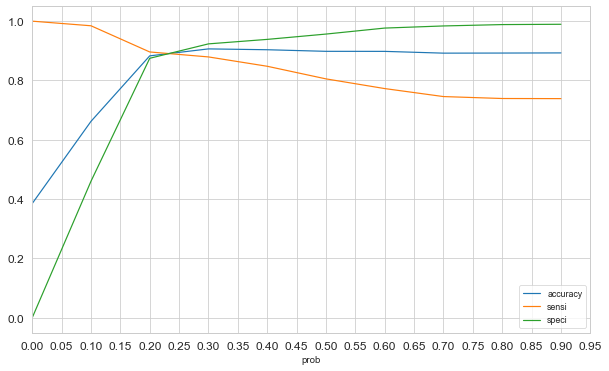

In [136]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the curve above, 0.24 is the optimum point to take it as a cutoff probability

In [137]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.200147,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.150590,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.008607,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.562451,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.996781,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9053692331916233

In [139]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3620,  285],
       [ 316, 2130]], dtype=int64)

In [140]:
#Sensitivity
print('Sensitivity : {}'.format(TP/float(TP+FN)))

#Specificity
print('Specificity : {}'.format(TN/float(TN+FP)))

#False negative rate
print('False Negative rate : {}'.format(FN/float(FN+TN)))

# False Positive rate
print('False Positive rate : {}'.format(TP/float(TP+FP)))

Sensitivity : 0.8053965658217498
Specificity : 0.9564660691421255
False Negative rate : 0.11303728330562812
False Positive rate : 0.9205607476635514


## Precision and Recall 

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3735,  170],
       [ 476, 1970]], dtype=int64)

In [142]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9205607476635514

In [143]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8053965658217498

## Precision and recall tradeoff 

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
p, r, thresholds= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

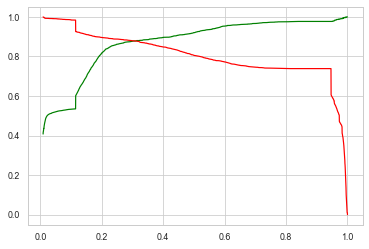

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.31 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.200147,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.150590,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.008607,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.562451,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.996781,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.906313966304519

In [149]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3608,  297],
       [ 298, 2148]], dtype=int64)

In [150]:
# Precision = TP / TP + FP
confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])

0.8785276073619632

In [151]:
#Recall = TP / TP + FN
confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])

0.8781684382665577

## Prediction on Test set 

In [152]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [153]:
x_test=x_test[col_rfe]
x_test.head()

,Total Time Spent on Website,Tags_Already a student,Tags_Closed by horizzon,Tags_Diploma holder (not eligible),Tags_Interested in full time mba,Tags_Interested in other courses,Tags_Lost to eins,Tags_Not doing further education,Tags_Ringing,Tags_Switched off,Tags_Will revert after reading the email,Lead Source_Welingak website
3271,0.070530,0,0,0,0,0,0,0,0,0,0,0
1490,0.679695,0,0,0,0,0,0,0,0,0,1,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0,1,0,0,0,0,0,0,0,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0,0


In [154]:
x_test_sm=sm.add_constant(x_test)

In [155]:
y_test_pred=res.predict(x_test_sm)

In [156]:
y_test_pred=pd.DataFrame(y_test_pred)

In [157]:
y_test_df=pd.DataFrame(y_test)

In [158]:
y_test_df['CustID'] = y_test_df.index

In [159]:
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [161]:
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.143696
1,1,1490,0.995450
2,0,7936,0.127516
3,1,4216,0.982303
4,0,3830,0.145136


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.31 else 0)

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9001101726037458

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1602,  132],
       [ 140,  849]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8584428715874621

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.9238754325259516

## Conclusion 

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. Total Time Spent on Website
2. Tags_Will revert after reading the email
3. Tags_Ringing
4. Tags_Closed by horizzon
5. Tags_Lost to eins
6. Tags_Already a student
7. Tags_Interested in other courses
8. Tags_Interested in full time mba
9. Tags_Not doing further education
10. Tags_Switched off
11. Lead Source_Welingak website
12. Tags_Diploma holder (not eligible)